This notebook clusters parameters in the SMNIST-4 (i.e., LHetA) network.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import scipy.cluster.hierarchy as sch
import sklearn
from sklearn.cluster import AgglomerativeClustering 

Clustering the Parameters

In [15]:
main_name = "smnist-4/smnist-4-final"
parameters = np.loadtxt("results/paper_results/smnist_results/" + main_name + "-256units-0itr-allparams.csv", delimiter=',')

(256, 8)


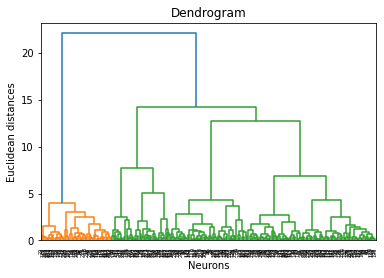

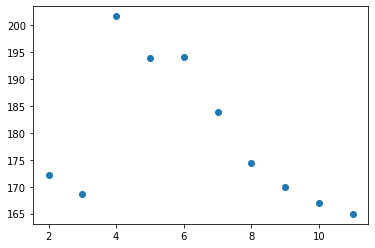

In [16]:
dendrogram = sch.dendrogram(sch.linkage(parameters, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Neurons')
plt.ylabel('Euclidean distances')
plt.show()

n_clusters_list = np.arange(2, 12, step=1)
ch_scores = []

for n_clusters in n_clusters_list:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage ='ward')
    y_hc=hc.fit_predict(parameters)
    ch_scores.append(sklearn.metrics.calinski_harabasz_score(parameters, y_hc))
plt.scatter(n_clusters_list, ch_scores)
results = np.zeros((len(ch_scores), 2))
results[:, 0] = n_clusters_list.reshape(-1)
results[:, 1] = ch_scores
np.savetxt("results/paper_results/smnist_results/" + main_name + "-256units-0itr-allparams-chscores.csv", results, delimiter=',')

In [14]:
best_n_clusters = n_clusters_list[np.argmax(ch_scores)]
print(f"using n_clusters {best_n_clusters}")

hc = AgglomerativeClustering(n_clusters = best_n_clusters, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(parameters)
np.savetxt("results/paper_results/smnist_results/" + main_name + "-256units-0itr-allparams-clusters.csv", y_hc, delimiter=',')

using n_clusters 5
